## Начало лабораторной работы

*Вариант 3:* Диабет у индейцев Пима 

In [46]:
import pandas as pd
from sklearn import set_config

# Установим параметры для вывода
set_config(transform_output="pandas")

random_state = 42

# Подключим датафрейм и выгрузим данные
df = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/diabetes.csv")
print(df.columns)
df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### Бизнес-цели:

1. Прогнозирование риска развития диабета

Описание: Классифицировать пациентов на основе их медицинских данных для определения риска развития диабета (используя целевой признак "Outcome"). Эта задача актуальна для раннего выявления диабета и разработки профилактических мер, направленных на улучшение здоровья населения.

2. Оценка факторов, влияющих на развитие диабета

Описание: Предсказать вероятность развития диабета у новых пациентов на основе их медицинских характеристик (таких как уровень глюкозы, артериальное давление, индекс массы тела и другие параметры). Это позволит медицинским специалистам планировать лечение и наблюдение в зависимости от индивидуальных рисков пациентов. 

### Определение достижимого уровня качества модели для первой задачи 

#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации
Целевой признак -- Outcome

In [47]:
from typing import Tuple
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

# Устанавливаем случайное состояние
random_state = 42

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> Tuple[DataFrame, DataFrame, DataFrame, DataFrame, DataFrame, DataFrame]:
   
    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )
    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))
    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.
    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )
    if frac_val <= 0:
        assert len(df_input) == len(df_train) + len(df_temp)
        return df_train, pd.DataFrame(), df_temp, y_train, pd.DataFrame(), y_temp
    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )
    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)
    return df_train, df_val, df_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Outcome", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1       90             62             12       43  27.2   
711            5      126             78             27       22  29.6   
373            2      105             58             40       94  34.9   
46             1      146             56              0        0  29.7   
682            0       95             64             39      105  44.6   
..           ...      ...            ...            ...      ...   ...   
451            2      134             70              0        0  28.9   
113            4       76             62              0        0  34.0   
556            1       97             70             40        0  38.1   
667           10      111             70             27        0  27.5   
107            4      144             58             28      140  29.5   

     DiabetesPedigreeFunction  Age  Outcome  
353                     0.580   24        0  
711                     0.439   40        0  
373                     0.225   25        0  
46                      0.564   29        0  
682                     0.366   22        0  
..                        ...  ...      ...  
451                     0.542   23        1  
113                     0.391   25        0  
556                     0.218   30        0  
667                     0.141   40        1  
107                     0.287   37        0  

[614 rows x 9 columns]

'y_train'

Outcome
353        0
711        0
373        0
46         0
682        0
..       ...
451        1
113        0
556        0
667        1
107        0

[614 rows x 1 columns]

'X_test'

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
44             7      159             64              0        0  27.4   
672           10       68            106             23       49  35.5   
700            2      122             76             27      200  35.9   
630            7      114             64              0        0  27.4   
81             2       74              0              0        0   0.0   
..           ...      ...            ...            ...      ...   ...   
32             3       88             58             11       54  24.8   
637            2       94             76             18       66  31.6   
593            2       82             52             22      115  28.5   
425            4      184             78             39      277  37.0   
273            1       71             78             50       45  33.2   

     DiabetesPedigreeFunction  Age  Outcome  
44                      0.294   40        0  
672                     0.285   47        0  
700                     0.483   26        0  
630                     0.732   34        1  
81                      0.102   22        0  
..                        ...  ...      ...  
32                      0.267   22        0  
637                     0.649   23        0  
593                     1.699   25        0  
425                     0.264   31        1  
273                     0.422   21        0  

[154 rows x 9 columns]

'y_test'

Outcome
44         0
672        0
700        0
630        1
81         0
..       ...
32         0
637        0
593        0
425        1
273        0

[154 rows x 1 columns]

#### Формирование конвейера для классификации данных
preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

In [48]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Построение конвейеров предобработки

class DiabetesFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Создание новых признаков
        X = X.copy()
        X["BMI_to_Age_ratio"] = X["BMI"] / X["Age"]
        return X

    def get_feature_names_out(self, features_in):
        # Добавление имен новых признаков
        new_features = ["BMI_to_Age_ratio"]
        return np.append(features_in, new_features, axis=0)

# Обработка числовых данных. Числовой конвейр: заполнение пропущенных значений медианой и стандартизация
preprocessing_num_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessing_cat_class = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

columns_to_drop = []
numeric_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                   "BMI", "DiabetesPedigreeFunction", "Age"]
cat_columns = ["Outcome"]

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("preprocessing_num", preprocessing_num_class, numeric_columns),
        ("preprocessing_cat", preprocessing_cat_class, cat_columns),
    ],
    remainder="passthrough"
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('preprocessing_cat', preprocessing_cat_class, ["Outcome"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("custom_features", DiabetesFeatures()),
        ("drop_columns", drop_columns),
    ]
)

#### Демонстрация работы конвейера

In [49]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
353    -0.851355 -0.980131      -0.404784      -0.553973 -0.331319 -0.607678   
711     0.356576  0.161444       0.465368       0.392787 -0.526398 -0.302139   
373    -0.549372 -0.504474      -0.622322       1.213312  0.142444  0.372594   
46     -0.851355  0.795653      -0.731091      -1.311380 -0.730766 -0.289408   
682    -1.153338 -0.821579      -0.296015       1.150195  0.244628  1.607482   
..           ...       ...            ...            ...       ...       ...   
451    -0.549372  0.415128       0.030292      -1.311380 -0.730766 -0.391255   
113     0.054593 -1.424076      -0.404784      -1.311380 -0.730766  0.258017   
556    -0.851355 -0.758158       0.030292       1.213312 -0.730766  0.779980   
667     1.866489 -0.314212       0.030292       0.392787 -0.730766 -0.569486   
107     0.054593  0.732232      -0.622322       0.455904  0.569759 -0.314870   

     DiabetesPedigreeFunction       Age  Outcome_1  BMI_to_Age_ratio  
353                  0.310794 -0.792169        0.0          0.767107  
711                 -0.116439  0.561034        0.0         -0.538540  
373                 -0.764862 -0.707594        0.0         -0.526564  
46                   0.262314 -0.369293        0.0          0.783681  
682                 -0.337630 -0.961320        0.0         -1.672162  
..                        ...       ...        ...               ...  
451                  0.195653 -0.876744        1.0          0.446259  
113                 -0.261879 -0.707594        0.0         -0.364639  
556                 -0.786072 -0.284718        0.0         -2.739481  
667                 -1.019383  0.561034        1.0         -1.015065  
107                 -0.577001  0.307308        0.0         -1.024606  

[614 rows x 10 columns]

#### Формирование набора моделей для классификации
 logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

In [50]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

# Определите random_state для воспроизводимости результатов
random_state = 42

# Определите модели машинного обучения для классификации
class_models = {
    "logistic": {"model": linear_model.LogisticRegression(random_state=random_state)},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced", random_state=random_state)},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210, random_state=random_state)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [52]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


#### Сводная таблица оценок качества для использованных моделей классификации

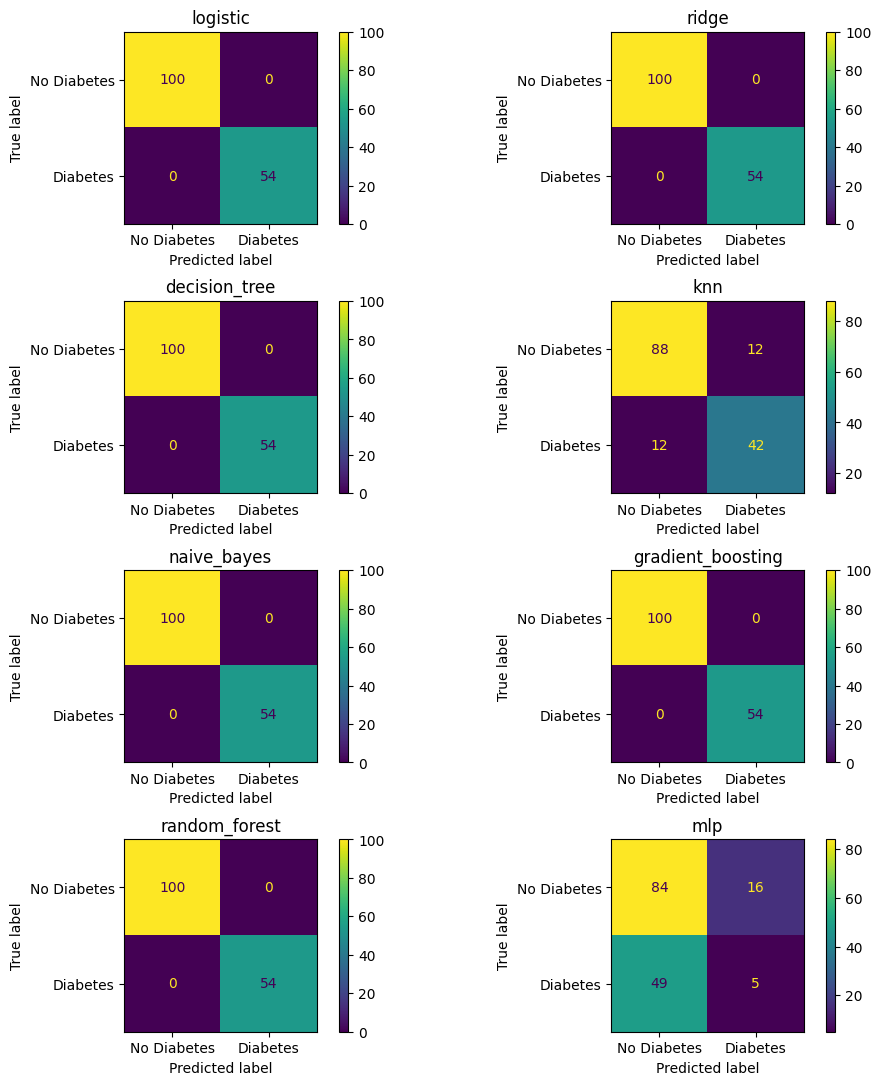

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Определите количество строк и столбцов для subplots
n_rows = int(len(class_models) / 2)
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 10), sharex=False, sharey=False)

for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["No Diabetes", "Diabetes"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

# Настройте расположение subplots
plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()


100 - количество истинных положительных диагнозов (True Positives), где модель правильно определила объекты как "No Diabetes".

54 в некоторых моделях - количество ложных отрицательных диагнозов (False Negatives), где модель неправильно определила объекты, которые на самом деле принадлежат к классу "No Diabetes", но были отнесены к классу "Diabetes". 

Исходя из значений True Positives и False Negatives, можно сказать, что модель имеет высокую точность при предсказании класса "No Diabetes". В принципе, уровень ложных отрицательных результатов в некоторых моделях (54) говорит нам о том, что существует некотрое небольшое количество примеров, которые модель пропускает.

Точность, полнота, верность (аккуратность), F-мера

In [65]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

Все модели в данной выборке, а именно логистическая регрессия, ридж-регрессия, дерево решений, KNN, наивный байесовский классификатор, градиентный бустинг, случайный лес и многослойный перцептрон (MLP) демонстрируют неплохие значения по всем метрикам на обучающих и тестовых наборах данных.

Модели MLP не так эффективна по сравнению с другими, но в некоторых метриках показывают высокие результаты. 

In [66]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

Схожий вывод можно сделать и для следующих метрик: Accuracy, F1, ROC AUC, Cohen's Kappa и MCC. Все модели, кроме KNN и MLP, указывают на хорошо-развитую способность к выделению классов

In [67]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'logistic'

#### Вывод данных с ошибкой предсказания для оценки

In [73]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Outcome"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 0'

Empty DataFrame
Columns: [Pregnancies, Predicted, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

#### Пример использования обученной модели (конвейера) для предсказания

In [88]:
model = class_models[best_model]["pipeline"]

example_id = 163
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
163          2.0    100.0           64.0           23.0      0.0  29.7   

     DiabetesPedigreeFunction   Age  Outcome  
163                     0.368  21.0      0.0

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
163    -0.549372 -0.663027      -0.296015       0.140318 -0.730766 -0.289408   

     DiabetesPedigreeFunction       Age  Outcome_1  BMI_to_Age_ratio  
163                  -0.33157 -1.045895        0.0          0.276709

'predicted: 0 (proba: [0.98965692 0.01034308])'

'real: 0'

#### Подбор гиперпараметров методом поиска по сетке 

In [89]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 50, 100],
    "model__max_features": ["sqrt", "log2"],
    "model__max_depth": [5, 7, 10],
    "model__criterion": ["gini", "entropy"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

c:\Users\TIGR228\Desktop\МИИ\Lab1\AIM-PIbd-31-Afanasev-S-S\aimenv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'model__criterion': 'gini',
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__n_estimators': 10}

#### Обучение модели с новыми гиперпараметрами

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics
import pandas as pd


# Определяем числовые признаки
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Установка random_state
random_state = 42

# Определение трансформера
pipeline_end = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
    # Добавьте другие трансформеры, если требуется
])

# Объявление модели
optimized_model = RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=5,
    max_features="sqrt",
    n_estimators=50,
)

# Создание пайплайна с корректными шагами
result = {}

# Обучение модели
result["pipeline"] = Pipeline([
    ("pipeline", pipeline_end),
    ("model", optimized_model)
]).fit(X_train, y_train.values.ravel())

# Прогнозирование и расчет метрик
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

# Метрики для оценки модели
result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [91]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [92]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

In [93]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

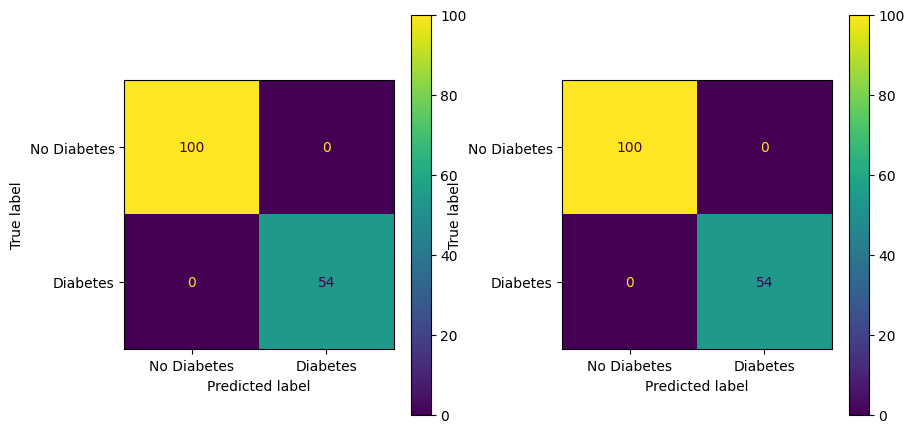

In [94]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["No Diabetes", "Diabetes"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()

В желтых квадрате мы наблюдаем значение 100, что обозначает количество правильно классифицированных объектов, отнесенных к классу "No Diabetes". Это свидетельствует о том, что модель успешно идентифицирует объекты этого класса, минимизируя количество ложных положительных срабатываний.

В бирюзовом квадрате значение 0 указывает на количество правильно классифицированных объектов, отнесенных к классу "Diabetes". Это является показателем не такой высокой точности модели в определении объектов данного класса.

### Определение достижимого уровня качества модели для второй задачи (задача регрессии)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config

# Установите random_state для воспроизводимости результатов
random_state = 42
set_config(transform_output="pandas")

df = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/diabetes.csv")

# Удалите столбцы, которые не нужны для анализа
df = df.drop(columns=["Outcome"])

df = df.sample(n=700, random_state=random_state).reset_index(drop=True)

print(df.shape)  
display(df)

(700, 8)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6       98             58             33      190  34.0   
1              2      112             75             32        0  35.7   
2              2      108             64              0        0  30.8   
3              8      107             80              0        0  24.6   
4              7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
695            2      105             80             45      191  33.7   
696            1      126             56             29      152  28.7   
697            2       95             54             14       88  26.1   
698            3      100             68             23       81  31.6   
699            1       85             66             29        0  26.6   

     DiabetesPedigreeFunction  Age  
0                       0.430   43  
1                       0.148   21  
2                       0.158   21  
3                       0.856   34  
4                       0.210   50  
..                        ...  ...  
695                     0.711   29  
696                     0.801   21  
697                     0.748   22  
698                     0.949   28  
699                     0.351   31  

[700 rows x 8 columns]

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/diabetes.csv")

required_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Отсутствуют столбцы: {missing_columns}")

df["diabetes_risk_index"] = (
    df["Glucose"] * 0.3  
    + df["BMI"] * 0.3  
    + df["Age"] * 0.2  
    + df["BloodPressure"] * 0.1  
    + df["Insulin"] * 0.1  
)

# Проверка новых данных
print(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "diabetes_risk_index"]].head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  diabetes_risk_index  
0                     0.627   50                71.68  
1                     0.351   31                46.28  
2                     0.672   32                74.69  
3                     0.167   21                55.33  
4                     2.288   33                81.43  


#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи регрессии 